# NLP Classification & Sentiment Analysis
## Bacchanel Buffet Restaurant Yorumları

<img src='yazıbacc.jpg'>

In [1]:
# Proje içinde ihtiyacımız olan Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from textblob import TextBlob
#her kelime pozitif veya negatif bir değer alır

#Dil tespit etmek için
from langdetect import detect

#Sentiment analiz yapmak için
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Resim eklemek için
import os
from PIL import Image

#NLP
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer

from nltk.corpus import stopwords
from stop_words import get_stop_words
import re

#WordCloud
from wordcloud import WordCloud,STOPWORDS

#Machine learning
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score


from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report

In [2]:
!pip install nltk

In [3]:
import nltk
from nltk.tokenize import sent_tokenize

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# EDA- Exploratary Data Analysis

In [7]:
df=pd.read_csv("restaurant.csv")

In [8]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [10]:
#Bize lazım olan sutunları alıyoruz
df=df[['stars', 'text']]

In [11]:
df.sample(7)

,stars,text
778,1,"7/24/16. Expensive, minus one. Selection, one...."
1055,1,"Second time here, first was this past Christma..."
9811,4,I was rather excited to visit this buffet afte...
7904,5,We usually do 1 buffet per trip to Vegas. This...
9017,5,"Hmmm, come here early, look for Groupon deals ..."
8109,2,I was pretty disappointed in the whole experie...
10334,4,種類豊富で美味しいと聞き来店。\nストローラー(バギー)も一緒に入れてもらえて助かりました。...


<img src='yelpimg.webp'>

In [12]:
#Yıldız verilerimiz
df.stars.value_counts().sort_values(ascending=False)

5    4247
4    2636
3    1561
1    1056
2     917
Name: stars, dtype: int64

<Axes: xlabel='stars', ylabel='count'>

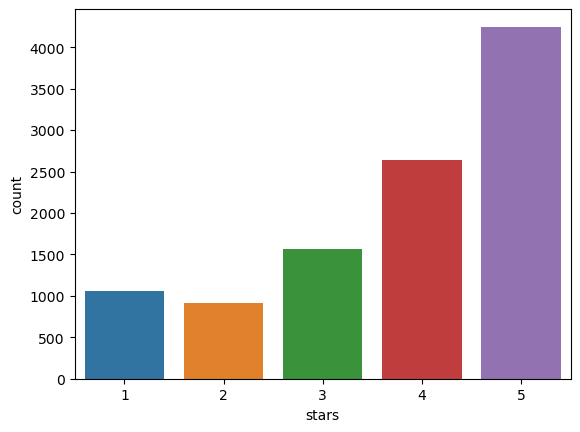

In [13]:
#Verilen yıldızları grafik ile görelim
sns.countplot(x=df['stars'])

### Veri Düzenleme ilk dört madde

In [14]:
# 1-Küçük harfe çevir
df['text']=df['text'].str.lower()

In [15]:
# 2-Noktalama işaretleri kaldır
df['text']=df['text'].str.replace('[^\w\s]','')

In [16]:
# 3-Rakamları kaldır
df['text']=df['text'].str.replace('\d+','')

In [17]:
# 4-Satır sonu,\n enter a basılmışsa \r
df['text']=df['text'].str.replace('\n',' ').replace('\r','')

### Veri Düzenleme 5-6-7-8

In [18]:
df.loc[(df['stars']==1)|(df['stars']==2),'sentiment']='negative'
df.loc[(df['stars']==3),'sentiment']='neutral'
df.loc[(df['stars']==4)|(df['stars']==5),'sentiment']='positive'

In [19]:
df=df[['stars','sentiment','text']]

In [20]:
df.sample(3)

,stars,sentiment,text
8875,5,positive,it was really good the key is to get there at ...
5036,5,positive,mind blown this place is absolutely amazing ev...
3601,5,positive,big enough i arrived there around pm and not t...


In [21]:
# yorum yapılan dilleri belirliyoruz
from langdetect import detect_langs
language = [detect_langs(i) for i in df.text]
languages = [str(i[0]).split(':')[0] for i in language]
df['language'] = languages

In [22]:
df.language.value_counts()

en       10373
es          10
zh-cn        7
ja           7
ko           6
fr           5
de           4
da           2
sw           1
pt           1
sk           1
Name: language, dtype: int64

In [23]:
df.head(3)

,stars,sentiment,text,language
0,5,positive,after getting food poisoning at the palms hote...,en
1,4,positive,a feast worthy of gods baccarnal buffet in ca...,en
2,4,positive,the crab legs are better than the ones at wick...,en


In [24]:
# sns.countplot(df['language'])

In [25]:
# Sadece İngilizce olanları alıyoruz veya da az sayıda olanları tranlate yapabiliriz
df=df[df['language']=='en']
df.reset_index(drop=True,inplace=True)

In [26]:
df[['polarity','subjectivity']]=df['text'].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [27]:
df.sentiment.value_counts()

positive    6852
negative    1964
neutral     1557
Name: sentiment, dtype: int64

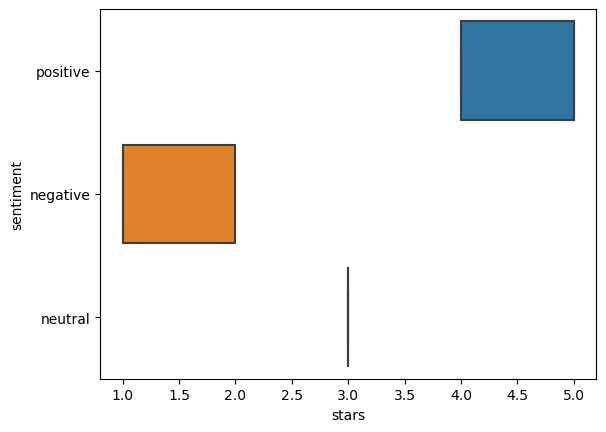

In [28]:
sns.boxplot(y='sentiment',x='stars',data=df);

In [29]:
# Modelllermeye başlamadan önce wordcloud ile yorumlarda en çok kullanılan kelieleri resimliyoruz

<img src='bacchanal.jpg'>

In [30]:
from wordcloud import WordCloud
#paketimizi tanımlıyoruz
from wordcloud import STOPWORDS
#en çok tekrar eden kelimeleri kaldırmak için
from PIL import Image
import numpy as np
#bu pil RESİMLERİ okuyor

In [31]:
import matplotlib.pyplot as plt

negatifte bunu
<img src='dislike3.png'>

pozitifte bunu
<img src='like3.png'>

### nötrde bunu okutmak istedim ama kaçkez denediysem de olmadı hocam 
<img src='neutral3.png'>

#### mecburen herkes gibi cloud u okuttum

In [32]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=100).generate(' '.join(data))
    plt.figure( figsize=(15,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [33]:
negative_data=df[df['sentiment']=="negative"]['text']
positive_data=df[df['sentiment']=="positive"]['text']
neutral_data=df[df['sentiment']=="neutral"]['text']

## <font color=green> Pozitif ( 4 ve 5 yıldızlı yorumlar )

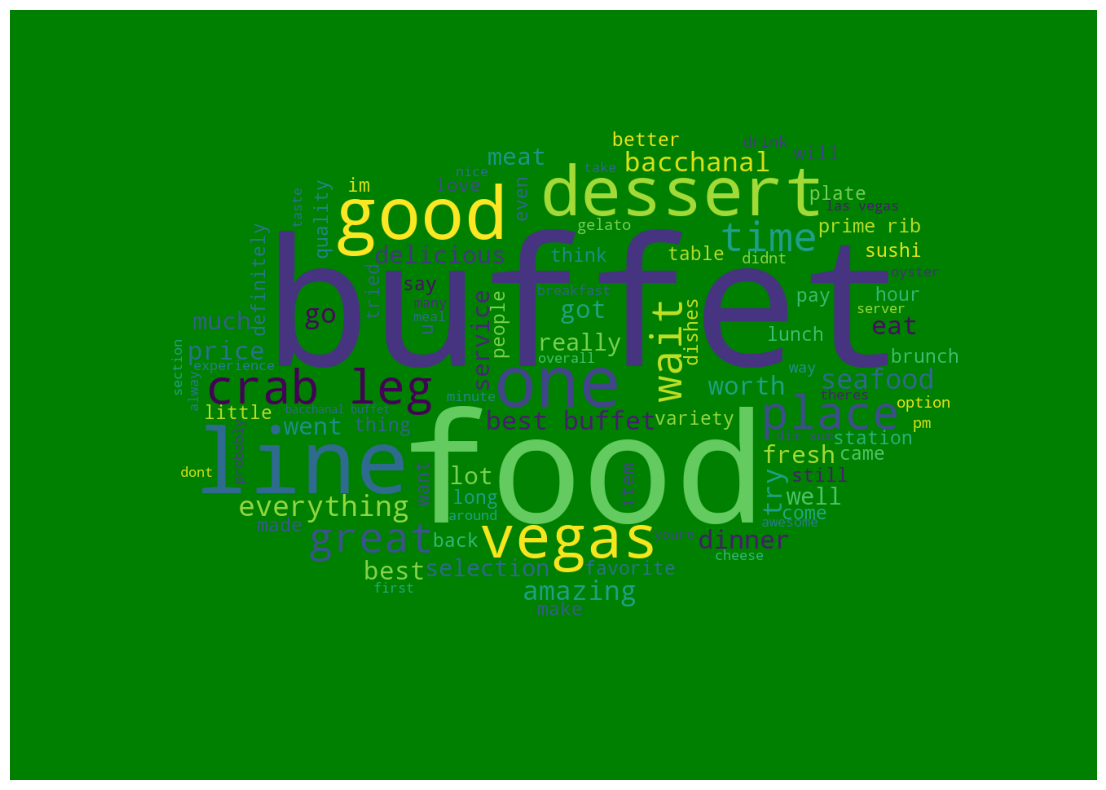

In [34]:
wc(positive_data,'green')

## <font color=orange> Nötr ( 3 yıldızlı yorumlar )

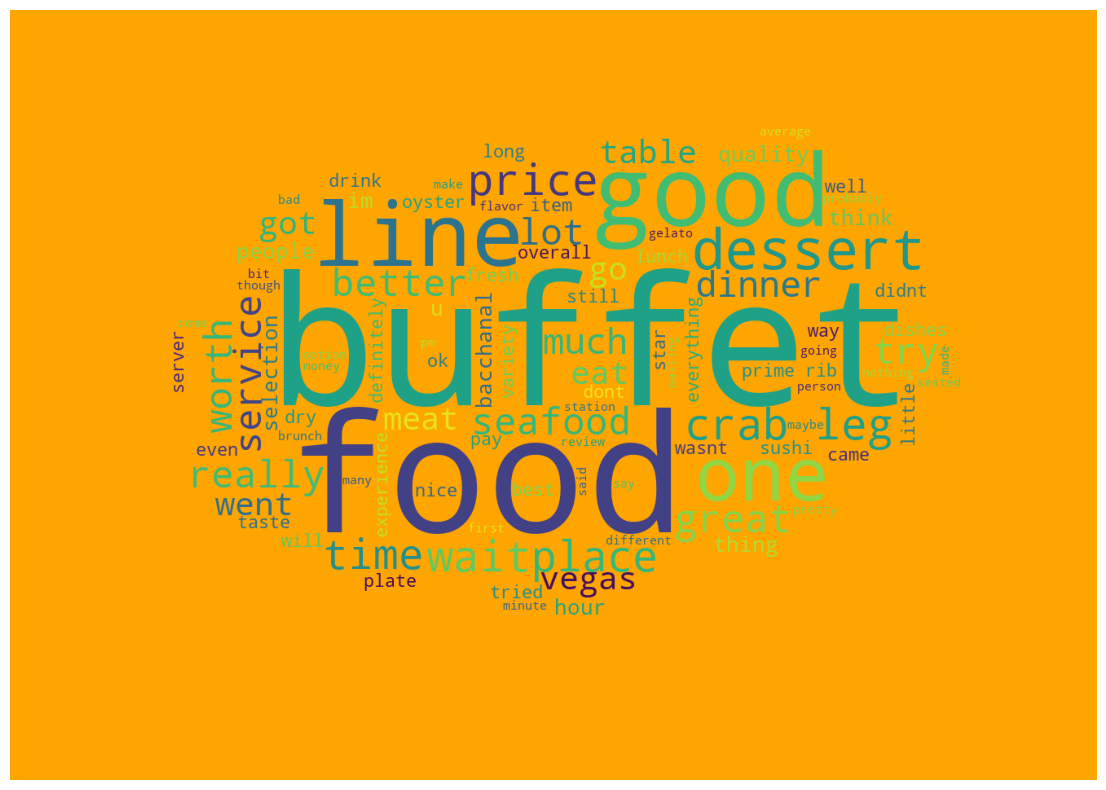

In [35]:
wc(neutral_data,'orange')

## <font color=red> Negatif ( 1-2 yıldızlı yorumlar )

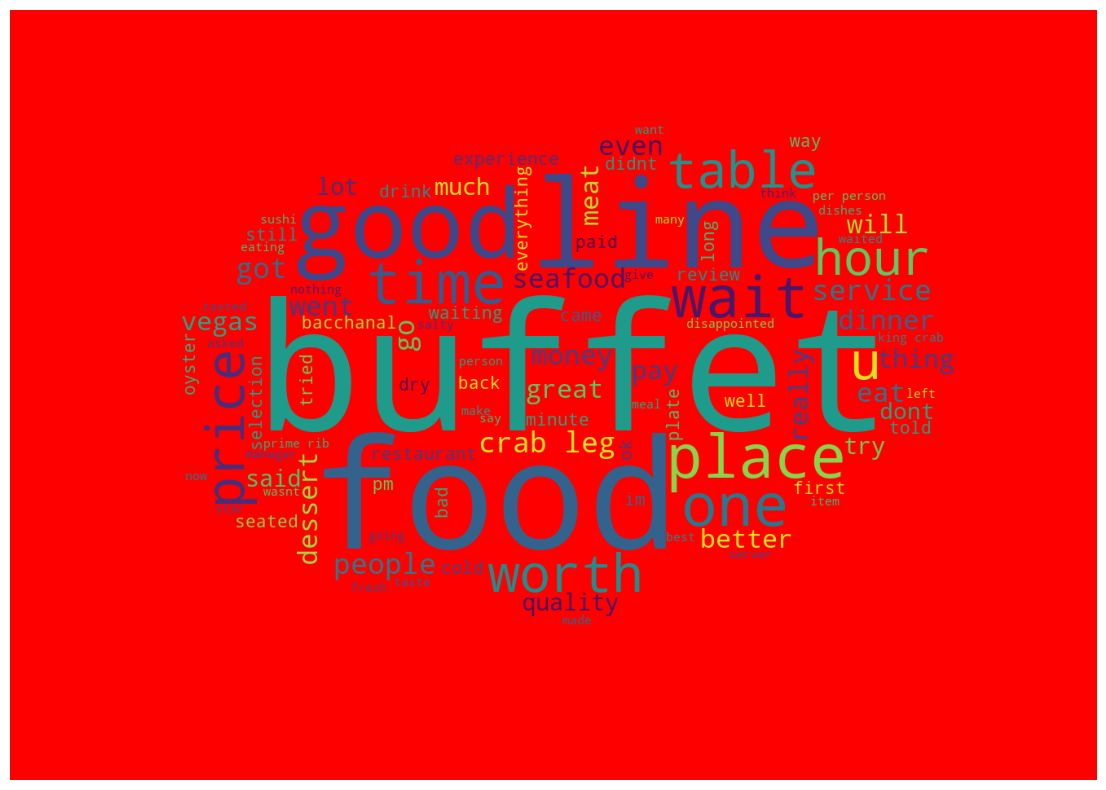

In [36]:
wc(negative_data,'red')

# Modelleme - Classification

In [37]:
x=df["text"]
y=df["sentiment"]

In [38]:
x.head()

0    after getting food poisoning at the palms hote...
1    a feast worthy of gods  baccarnal buffet in ca...
2    the crab legs are better than the ones at wick...
3    not worth it too salty food and expensive this...
4    i would give this infinite stars if i could my...
Name: text, dtype: object

In [39]:
y.head()

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

In [40]:
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [41]:
#Lemma
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [42]:
#Stopwords
#vect=CountVectorizer(stop_words="english")
vect=CountVectorizer(stop_words="english",ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

In [43]:
#şimdi 6 ve 8.maddeleri burada yapıyoruz yani yazı olan x'i vektöre çeviriyoruz
x=vect.fit_transform(x) 

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20)

In [45]:
#Logistic Regression'u çağırdık
l=LogisticRegression()
d=DecisionTreeClassifier()
#decisiontree classfier da yapabiliriz

In [46]:
l.fit(x_train,y_train) #eğittik

LogisticRegression()

In [47]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
pred=l.predict(x_test) #tahmin ediyoruz

In [49]:
#başarı oranını hesaplıyoruz
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(pred,y_test)

0.7946987951807228

In [51]:
# Diğer algoritma

In [52]:
def tokenize_test(vect,x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    g=GaussianNB()
    b=BernoulliNB()
    SVC=SVC()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGBC=XGBClassifier()
    
    algos=[g,b,SVC,KN,D,R,Log,XGBC]
    algo_names=['GaussianNB','BernoulliNB','SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
    
    algos=[g,b,SVC]
    algo_names=['GaussianNB','BernoulliNB','SVC']
    
    
    accuracy_scored=[]    
        
    x_train_dtm=vect.fit_transform(x_train).toarray()
    x_test_dtm=vect.transform(x_test).toarray()
    
    for item in algos:
        item.fit(x_train_dtm,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test_dtm)))
    result=pd.DataFrame(accuracy_scored,columns=['accuracy_score'],index=algo_names)
    result.accuracy_score=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [53]:
vect=CountVectorizer()
tokenize_test(vect,x,y)

(8298, 10000) (2075, 10000) (8298,) (2075,)


AttributeError: lower not found

# PYCARET

In [ ]:
x=df["text"]
y=df["sentiment"]

In [ ]:
from pycaret.classification import*

In [ ]:
exp_name=setup(data=df,target="sentiment")

In [ ]:
best_model=compare_models()